In [ ]:
from local.torch_basics import *
from local.test import *
from local.core import *
from local.layers import *
from local.data.all import *
from local.optimizer import *
from local.learner import *
from local.metrics import *
from local.callback.all import *
from local.vision.all import *

AttributeError: module 'local.utils' has no attribute 'cpus'

In [ ]:
path = untar_data(URLs.CAMVID)

In [ ]:
camvid = DataBlock(types=(PILImage, PILMask),
                   get_items=get_image_files,
                   splitter=RandomSplitter(),
                   get_y=lambda o: path/'labels'/f'{o.stem}_P{o.suffix}')

In [ ]:
dbunch = camvid.databunch(path/"images", bs=16, item_tfms=Resize((360,480)), 
                          batch_tfms=[*aug_transforms(), Normalize(*imagenet_stats)])

In [ ]:
dbunch.show_batch(max_n=9, vmin=1, vmax=30)

In [ ]:
codes = np.loadtxt(path/'codes.txt', dtype=str)
dbunch.vocab = codes

In [ ]:
name2id = {v:k for k,v in enumerate(codes)}
void_code = name2id['Void']

def acc_camvid(input, target):
    input = input.argmax(dim=1)
    target = target.squeeze(1)
    mask = target != void_code
    mask.__class__ = Tensor
    return (input[mask]==target[mask]).float().mean()

In [ ]:
opt_func = partial(Adam, lr=3e-3, wd=0.01)

In [ ]:
learn = unet_learner(dbunch, resnet34, loss_func=CrossEntropyLossFlat(axis=1), opt_func=opt_func, path=path, metrics=acc_camvid)

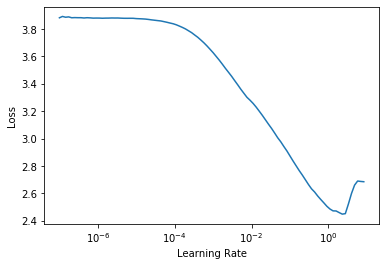

In [ ]:
learn.lr_find()

In [ ]:
lr= 1e-2#3e-3

In [ ]:
learn.fit_one_cycle(10, slice(lr))

epoch,train_loss,valid_loss,acc_camvid,time
0,3.393239,4.132429,0.186801,00:36
1,2.294684,1.828597,0.774973,00:36


KeyboardInterrupt: 

In [ ]:
learn.save('stage-1')

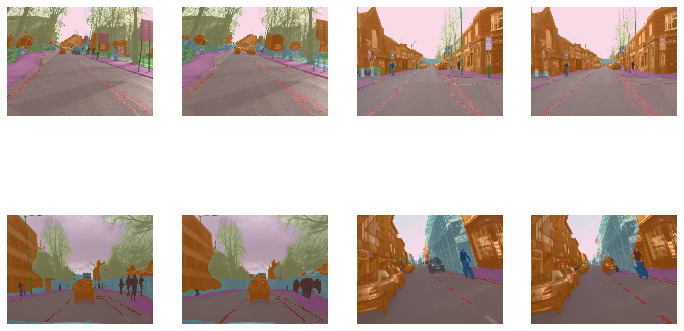

In [ ]:
learn.show_results(max_n=4, vmin=1, vmax=30)

In [ ]:
learn.load('stage-1')
learn.unfreeze()

In [ ]:
learn.opt.clear_state()

In [ ]:
learn.model

DynamicUnet(
  (layers): ModuleList(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (4): Sequential(
        (0): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplace=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (1): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05

In [ ]:
learn.opt.state_dict()

{'state': [{},
  {'force_train': True, 'do_wd': False},
  {'force_train': True, 'do_wd': False},
  {},
  {'force_train': True, 'do_wd': False},
  {'force_train': True, 'do_wd': False},
  {},
  {'force_train': True, 'do_wd': False},
  {'force_train': True, 'do_wd': False},
  {},
  {'force_train': True, 'do_wd': False},
  {'force_train': True, 'do_wd': False},
  {},
  {'force_train': True, 'do_wd': False},
  {'force_train': True, 'do_wd': False},
  {},
  {'force_train': True, 'do_wd': False},
  {'force_train': True, 'do_wd': False},
  {},
  {'force_train': True, 'do_wd': False},
  {'force_train': True, 'do_wd': False},
  {},
  {'force_train': True, 'do_wd': False},
  {'force_train': True, 'do_wd': False},
  {},
  {'force_train': True, 'do_wd': False},
  {'force_train': True, 'do_wd': False},
  {},
  {'force_train': True, 'do_wd': False},
  {'force_train': True, 'do_wd': False},
  {},
  {'force_train': True, 'do_wd': False},
  {'force_train': True, 'do_wd': False},
  {},
  {'force_train':

In [ ]:
lr = 1e-3
lrs = slice(lr/100,lr)

In [ ]:
learn.fit_one_cycle(12, lrs)

epoch,train_loss,valid_loss,acc_camvid,time
0,0.395098,0.386613,0.901872,00:38
1,0.392343,0.382084,0.901273,00:38
2,0.393983,0.384553,0.902038,00:38
3,0.388766,0.374004,0.903756,00:39
4,0.383934,0.374316,0.901997,00:38
5,0.378122,0.370630,0.901933,00:38
6,0.370339,0.368243,0.906371,00:38
7,0.360981,0.359852,0.906657,00:38
8,0.359237,0.359984,0.906485,00:39
9,0.356872,0.357077,0.907436,00:38


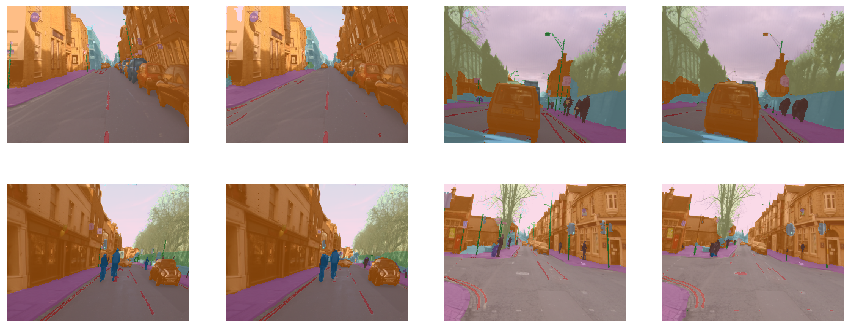

In [ ]:
learn.show_results(max_n=4, vmin=1, vmax=30, figsize=(15,6))